In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/Health_insurance.csv")

In [3]:
df.head()

,pid,age,sex,bmi,children,smoker,region,diabetes,heart rate,Creatinine,glucose,charges,Unnamed: 12,Unnamed: 13,normalization,z score
0,1,19.0,Female,27.900,0,yes,southwest,1,68.837838,1.958333,114.636364,16884.92400,NaN,NaN,0.251611,0.657807
1,2,18.0,male,33.770,1,no,southeast,0,101.370370,1.122222,147.500000,NaN,NaN,NaN,-0.017907,-0.746440
2,3,28.0,mal,33.000,3,no,southeast,0,72.318182,1.871429,149.000000,4449.46200,NaN,NaN,0.053115,-0.376397
3,4,33.0,male,22.705,0,no,northwest,0,94.500000,0.585714,128.250000,21984.47061,min,1121.87390,0.333010,1.081914
4,5,32.0,NaN,28.880,0,no,northwest,0,67.920000,1.950000,145.750000,3866.85520,max,63770.42801,0.043816,-0.424850


In [4]:
df.tail()

,pid,age,sex,bmi,children,smoker,region,diabetes,heart rate,Creatinine,glucose,charges,Unnamed: 12,Unnamed: 13,normalization,z score
1173,1173,56.0,female,41.91,0,no,southeast,1,100.125000,8.385714,120.000000,11093.6229,NaN,NaN,0.159170,0.176169
1174,1174,38.0,male,29.26,2,no,northwest,1,114.640000,1.900000,138.333333,6457.8434,NaN,NaN,0.085173,-0.209369
1175,1175,29.0,male,32.11,2,no,northwest,1,52.720000,2.728571,99.000000,4433.9159,NaN,NaN,0.052867,-0.377690
1176,1176,22.0,female,27.10,0,no,southwest,1,93.400000,1.736364,135.166667,2154.3610,NaN,NaN,0.016481,-0.567271
1177,1177,52.0,female,24.13,1,yes,northwest,1,67.289855,8.257143,108.428571,23887.6627,NaN,NaN,0.363389,1.240194


In [5]:
column = df.columns
print(column)

Index(['pid', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'diabetes',
       'heart rate', 'Creatinine', 'glucose', 'charges', 'Unnamed: 12',
       'Unnamed: 13', 'normalization', 'z score'],
      dtype='object')


In [6]:

df = df.drop(['Unnamed: 12','Unnamed: 13',
       'normalization', 'z score'], axis=1)
df.columns


Index(['pid', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'diabetes',
       'heart rate', 'Creatinine', 'glucose', 'charges'],
      dtype='object')

In [7]:
df_drop_duplicate = df.drop_duplicates("pid")

In [8]:
unique_values = df_drop_duplicate['sex'].unique()
print(unique_values)

['Female' 'male' 'mal' nan 'female']


In [9]:

df_drop_duplicate['sex'] = df_drop_duplicate['sex'].replace({'mal': 'male', 'Female': 'female'})



<ipython-input-9-79abd5ac1932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_duplicate['sex'] = df_drop_duplicate['sex'].replace({'mal': 'male', 'Female': 'female'})


In [10]:
sex_counts = df_drop_duplicate['sex'].value_counts()
print(sex_counts)

sex
male      596
female    579
Name: count, dtype: int64


In [11]:
df_drop_duplicate['sex'] = df_drop_duplicate['sex'].fillna("male")

<ipython-input-11-39863c90311b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_duplicate['sex'] = df_drop_duplicate['sex'].fillna("male")


In [12]:
df = pd.get_dummies(df_drop_duplicate, columns=['sex','smoker','region'])

In [13]:
df.head()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,19.0,27.900,0,1,68.837838,1.958333,114.636364,16884.92400,True,False,False,True,False,False,False,True
1,2,18.0,33.770,1,0,101.370370,1.122222,147.500000,NaN,False,True,True,False,False,False,True,False
2,3,28.0,33.000,3,0,72.318182,1.871429,149.000000,4449.46200,False,True,True,False,False,False,True,False
3,4,33.0,22.705,0,0,94.500000,0.585714,128.250000,21984.47061,False,True,True,False,False,True,False,False
4,5,32.0,28.880,0,0,67.920000,1.950000,145.750000,3866.85520,False,True,True,False,False,True,False,False


In [14]:
for i in ["age","bmi","children","diabetes","heart rate","Creatinine","glucose"]:

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    print(df.shape) # Fixed indentation by aligning with the previous line

(1175, 17)
(1166, 17)
(1166, 17)
(1166, 17)
(1149, 17)
(1068, 17)
(1004, 17)


In [15]:
missing_values = df_drop_duplicate.isnull().sum()
print(missing_values)

pid            0
age            1
sex            0
bmi            3
children       0
smoker         0
region         0
diabetes       0
heart rate    13
Creatinine     0
glucose       18
charges        4
dtype: int64


In [16]:
for i in ["bmi","children","heart rate","glucose"]:
    mean_i = df[i].mean()
    df[i].fillna(mean_i, inplace=True)
    print(df.shape)

(1004, 17)
(1004, 17)
(1004, 17)
(1004, 17)


<ipython-input-16-b925dd9ea08f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mean_i, inplace=True)


In [17]:
df.dropna(subset = "charges", inplace=True)

In [18]:
#normalise numerical columns
min_max_values = {}
cols = ["age","bmi","children","heart rate","glucose","Creatinine"]
for i in cols:
    min_value = df[i].min()
    max_value = df[i].max()
    min_max_values[i] = (min_value, max_value)


In [19]:
min_max_values

{'age': (18.0, 64.0),
 'bmi': (15.96, 47.52),
 'children': (0, 5),
 'heart rate': (39.32142857, 129.125),
 'glucose': (69.1, 252.0),
 'Creatinine': (0.266666667, 3.311111111)}

In [20]:
import json
with open('min_max_values.json', 'w') as json_file:
    json.dump(min_max_values, json_file)

In [21]:
df.head()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,19.0,27.900,0,1,68.837838,1.958333,114.636364,16884.92400,True,False,False,True,False,False,False,True
2,3,28.0,33.000,3,0,72.318182,1.871429,149.000000,4449.46200,False,True,True,False,False,False,True,False
3,4,33.0,22.705,0,0,94.500000,0.585714,128.250000,21984.47061,False,True,True,False,False,True,False,False
4,5,32.0,28.880,0,0,67.920000,1.950000,145.750000,3866.85520,False,True,True,False,False,True,False,False
5,6,31.0,25.740,0,0,74.181818,1.612500,98.333333,3756.62160,True,False,True,False,False,False,True,False


In [22]:
df.corr()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
pid,1.000000,0.012133,-0.006485,0.024200,0.031853,0.056365,0.042636,0.062782,0.001690,-0.021298,0.021298,0.013109,-0.013109,0.010166,0.017773,-0.007932,-0.019481
age,0.012133,1.000000,0.126889,0.027479,0.095221,-0.016098,0.033964,0.052191,0.309737,0.040332,-0.040332,0.021898,-0.021898,0.002004,-0.001031,-0.012594,0.012073
bmi,-0.006485,0.126889,1.000000,0.000818,-0.032576,-0.042292,0.051216,-0.013866,0.194015,-0.041067,0.041067,0.009861,-0.009861,-0.121795,-0.142507,0.275431,-0.023171
children,0.024200,0.027479,0.000818,1.000000,-0.006503,-0.042720,0.023302,0.024699,0.055465,0.005743,-0.005743,-0.018354,0.018354,-0.017595,0.019754,-0.016139,0.014626
diabetes,0.031853,0.095221,-0.032576,-0.006503,1.000000,-0.150506,0.146306,0.324771,0.030708,-0.005414,0.005414,-0.007326,0.007326,0.024017,0.023028,-0.031534,-0.013996
heart rate,0.056365,-0.016098,-0.042292,-0.042720,-0.150506,1.000000,-0.200562,-0.026319,0.029047,0.018794,-0.018794,-0.044362,0.044362,0.045950,-0.074782,0.056579,-0.030173
Creatinine,0.042636,0.033964,0.051216,0.023302,0.146306,-0.200562,1.000000,0.039940,0.028688,-0.012710,0.012710,0.023078,-0.023078,-0.022032,-0.010779,0.046054,-0.015140
glucose,0.062782,0.052191,-0.013866,0.024699,0.324771,-0.026319,0.039940,1.000000,-0.018975,-0.071859,0.071859,0.053356,-0.053356,0.017245,-0.004282,-0.003536,-0.009223
charges,0.001690,0.309737,0.194015,0.055465,0.030708,0.029047,0.028688,-0.018975,1.000000,-0.029807,0.029807,-0.778645,0.778645,0.030985,-0.054511,0.087985,-0.067909
sex_female,-0.021298,0.040332,-0.041067,0.005743,-0.005414,0.018794,-0.012710,-0.071859,-0.029807,1.000000,-1.000000,0.057351,-0.057351,-0.012199,0.020490,-0.003194,-0.004868


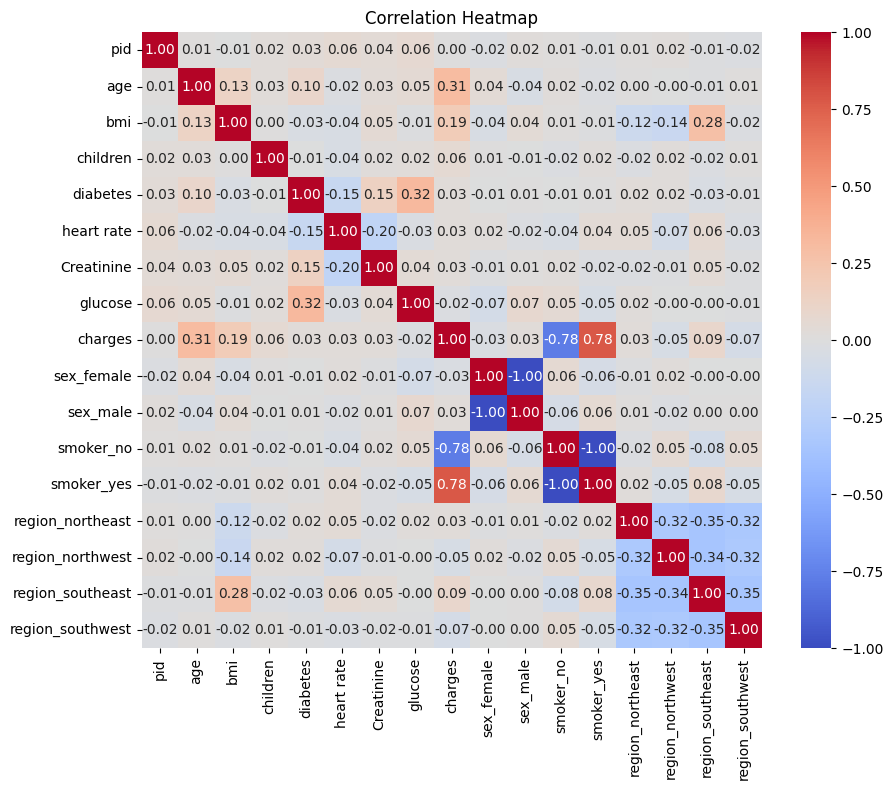

In [23]:
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [24]:
x = df.drop(columns = ['charges','pid','sex_male','smoker_no'],axis=1)
y = df['charges']

In [25]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
#linear Regression model to predit the outcome
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [27]:
#compute the mean square error and e2 score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Root Mean Squared Error: 5814.255816018951
R-squared: 0.7709297956105808


In [29]:
pd.DataFrame(x.columns,reg.coef_) #DataFrame instead of Dtaframe

,0
249.431757,age
335.990528,bmi
186.204172,children
-227.584428,diabetes
14.876827,heart rate
733.905500,Creatinine
-0.716439,glucose
-24.985043,sex_female
23474.975104,smoker_yes
816.779776,region_northeast


In [30]:
x_test_sample = x_test.iloc[3,:]
x_test_sample_reshaped = x_test_sample.values.reshape(1, -1)

In [31]:
print(x_test_sample)

age                      42.0
bmi                     28.31
children                    3
diabetes                    1
heart rate          88.653846
Creatinine                1.2
glucose                 143.0
sex_female              False
smoker_yes               True
region_northeast        False
region_northwest         True
region_southeast        False
region_southwest        False
Name: 642, dtype: object


In [32]:
print(x_test_sample_reshaped)

[[np.float64(42.0) np.float64(28.31) np.int64(3) np.int64(1)
  np.float64(88.65384615) np.float64(1.2) np.float64(143.0) np.False_
  np.True_ np.False_ np.True_ np.False_ np.False_]]


In [33]:
y_prep_sample = reg.predict(x_test_sample_reshaped)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
y_prep_sample

array([32195.73891569])

In [35]:
import joblib
joblib.dump(reg, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [36]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [37]:
streamlit_code = """
import streamlit as st
import joblib
import numpy as np
import json

#load the trained model
model = joblib.load('linear_regression_model.pkl')

#streamlit app
st.title("Insurance Charges Prediction")
st.write("Enter the input values for prediction.")

#input fields for each feature

age = st.number_input("Age",min_value=18,max_value=65,step=1,value=30)
bmi = st.number_input("BMI",min_value=15.0,max_value=50.0,step=0.1,value=25.0)
children = st.number_input("Children",min_value=0,max_value=10,step=1,value=0)
diabetes = st.selectbox("Has Diabetes?",options=["No","Yes"])
heart_rate = st.number_input("Heart Rate",min_value=50,max_value=100,step=1,value=70)
creatinine = st.number_input("Creatinine",min_value=0.1,max_value=10.0,step=0.1,value=1.5)
glucose = st.number_input("Glucose",min_value=40,max_value=300,step=1,value=100)

#categorical features
sex_female = st.selectbox("Sex",options=["Male","Female"])=="Female"
smoker_no = st.selectbox("Smoker?",options=["Yes","No"]) == "No"

#Region selection
region = st.selectbox("Region",options=["Southwest","Southeast","Northwest","Northeast"])
region_southeast = region == "SouthWest"
region_northwest = region == "NorthWest"
region_northeast = region == "NorthEast"
region_southwest = region == "SouthEast"

#Normalization function
def min_max_scale(value,min_val,max_val):
  return (value-min_val)/(max_val-min_val)

#load min-max values from JSON
with open("min_max_values.json","r")as json_file:
  min_max_values = json.load(json_file)

#Normalize inputs
age_norm = min_max_scale(age,*min_max_values["age"])
bmi_norm = min_max_scale(bmi,*min_max_values["bmi"])
heart_rate_norm = min_max_scale(heart_rate,*min_max_values["heart rate"])
creatinine_norm = min_max_scale(creatinine, *min_max_values['Creatinine'])
glucose_norm = min_max_scale(glucose,*min_max_values["glucose"])

#prepare input data for prediction
input_data = np.array([
  age_norm,bmi_norm,children,int(diabetes == "Yes"),heart_rate_norm,
  creatinine_norm,glucose_norm,
  int(sex_female),int(smoker_no),
  int(region_southeast),int(region_northwest),int(region_northeast),int(region_southwest)
]).reshape(1,-1)

#predict button
if st.button("Predict Charges"):
  prediction = model.predict(input_data)
  st.success(f"Predicted insurance charges: ${prediction[0]:,.2f}")

"""

#save the code to a file
with open('app.py','w')as f:
  f.write(streamlit_code)


In [38]:
!streamlit run app.py &>/content/logs.txt &

In [39]:
from pyngrok import ngrok
ngrok.set_auth_token("2tqLnUwPAU9gjGXqxNYummeJsa5_Hvkmbru17fhPW3pDpP4r")

In [40]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print(f"streamlit App is live at: {public_url}")

streamlit App is live at: NgrokTunnel: "https://96be-34-75-228-50.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pkill -f ngrok

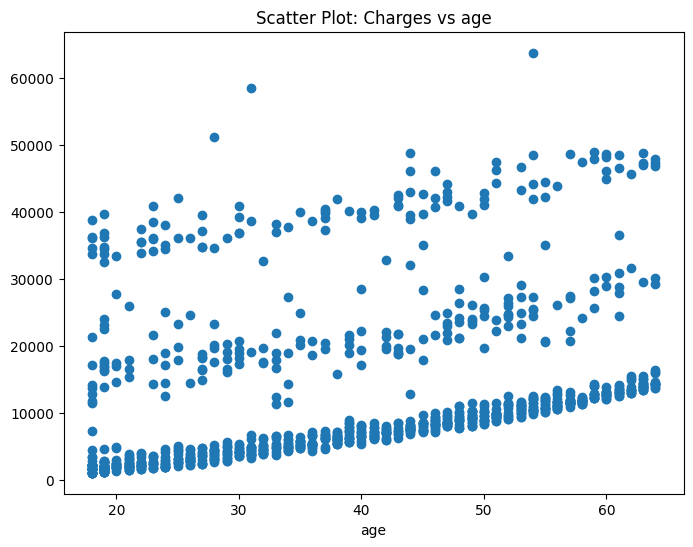

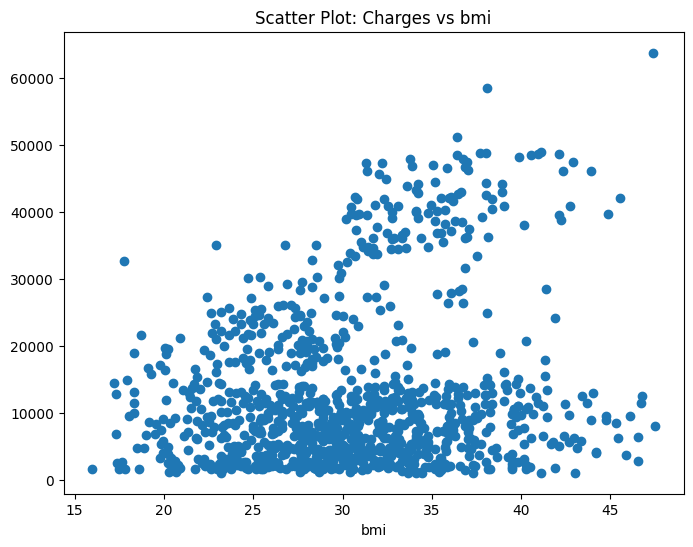

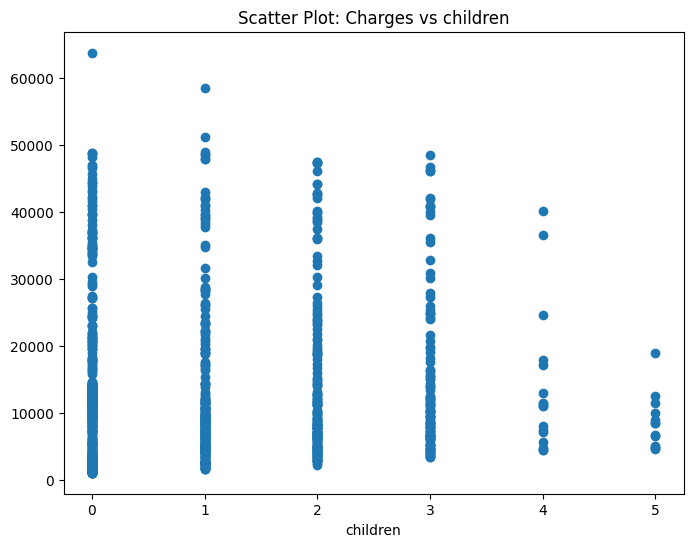

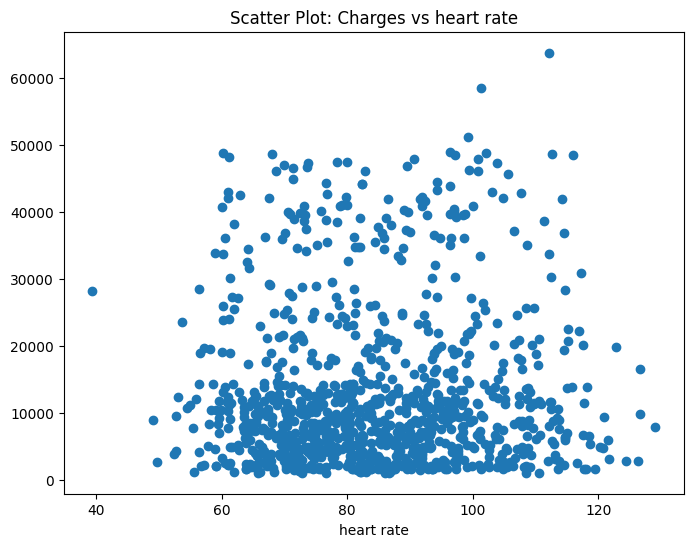

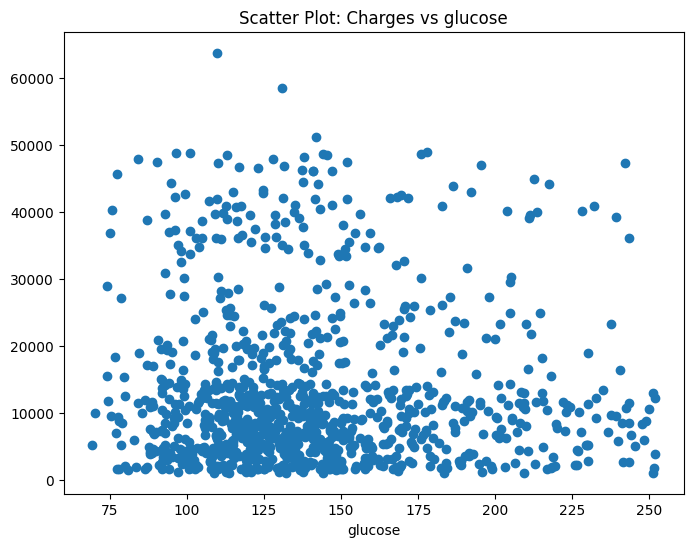

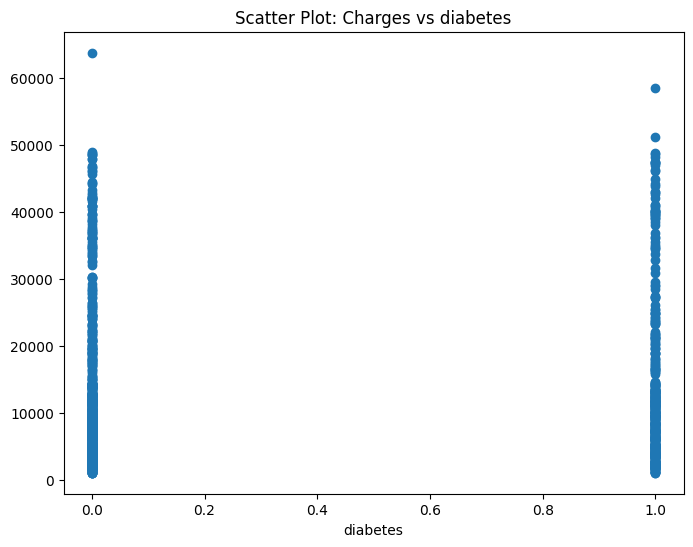

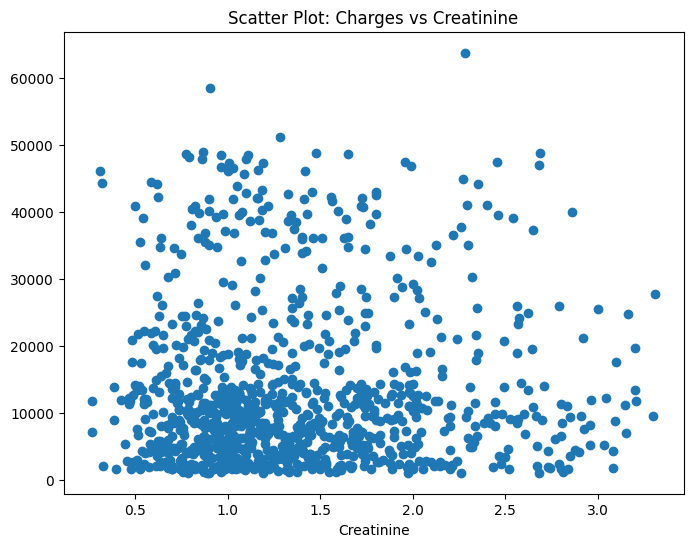

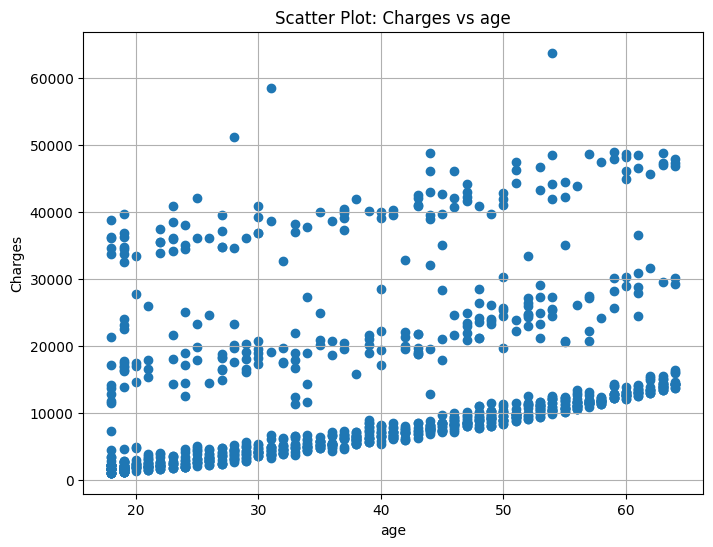

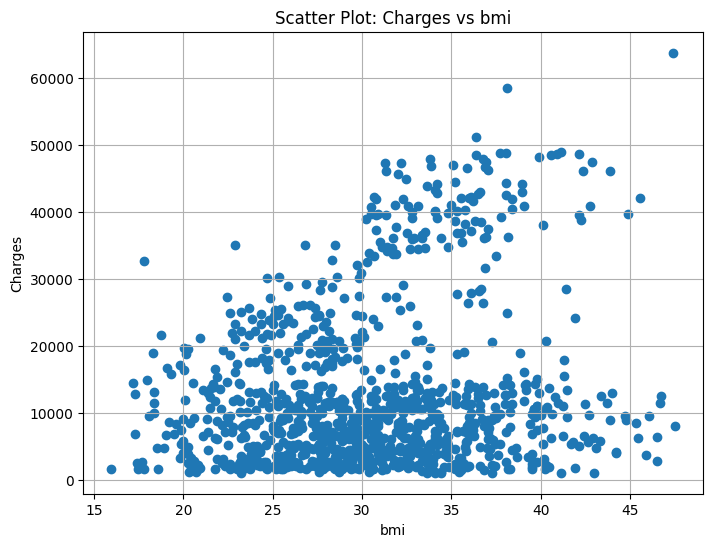

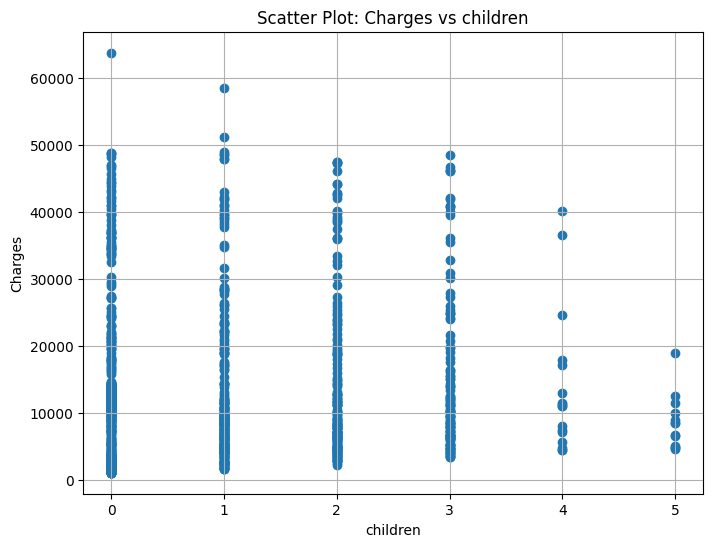

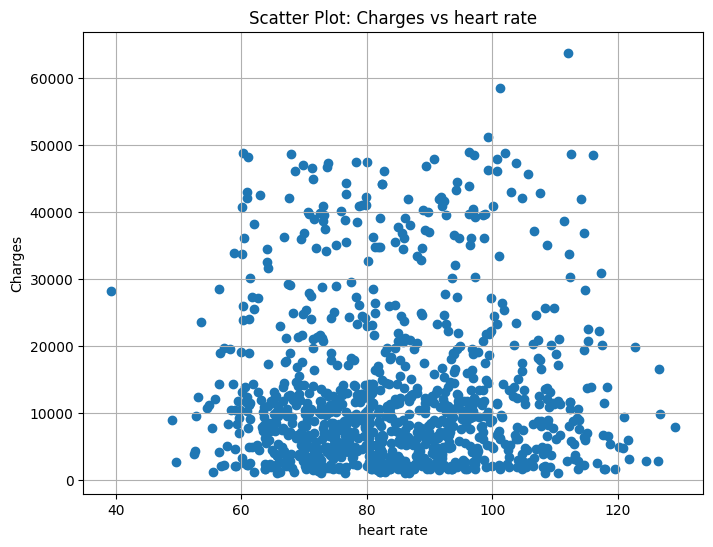

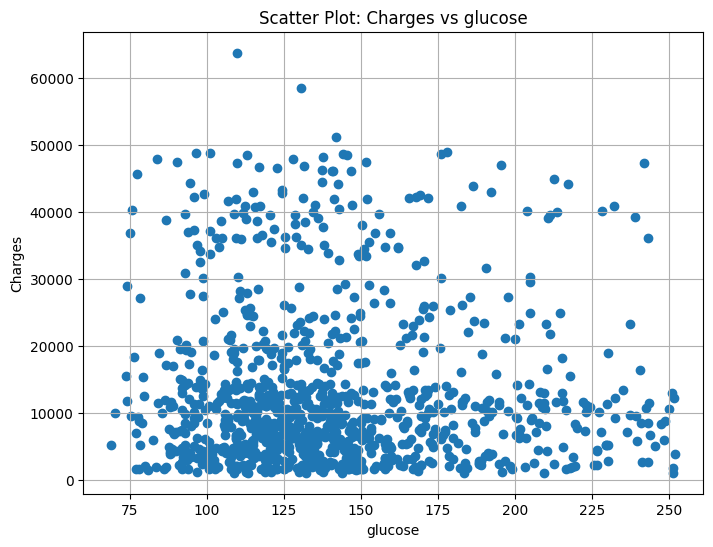

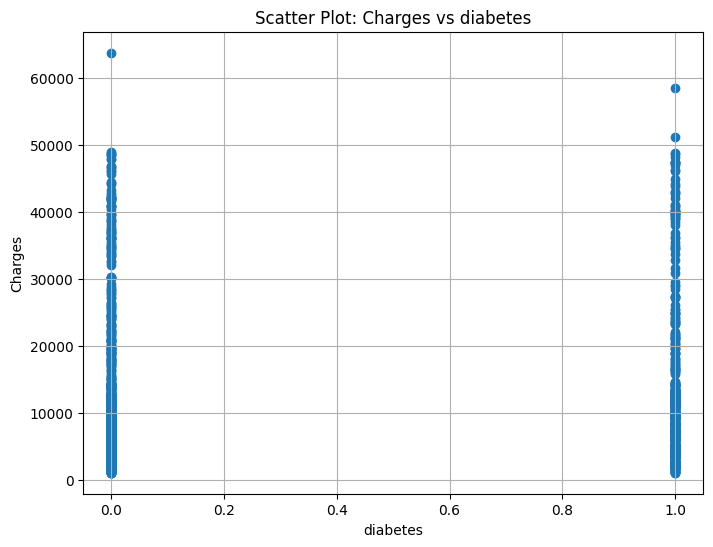

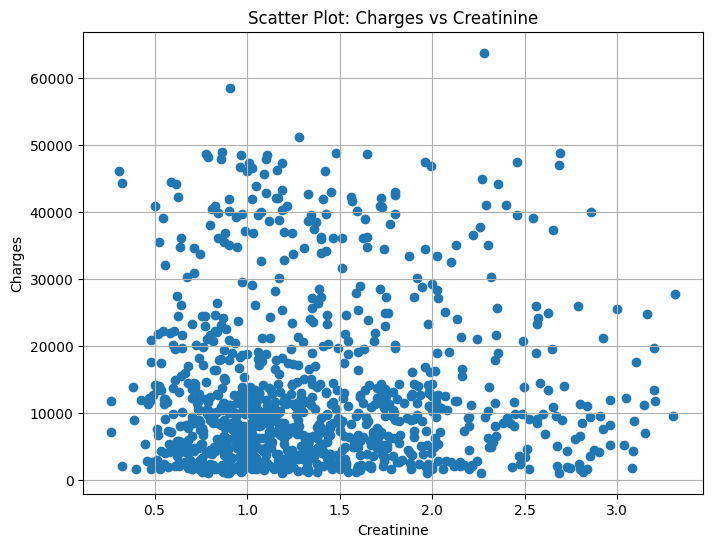

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

columns_to_plot = ['age', 'bmi', 'children', 'heart rate', 'glucose', 'diabetes', 'Creatinine']

# Create scatter plots
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.scatter(df[column], df['charges'])
    plt.title(f'Scatter Plot: Charges vs {column}')
    plt.xlabel(column)
import matplotlib.pyplot as plt
import pandas as pd

columns_to_plot = ['age', 'bmi', 'children', 'heart rate', 'glucose', 'diabetes', 'Creatinine']

# Create scatter plots
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.scatter(df[column], df['charges'])
    plt.title(f'Scatter Plot: Charges vs {column}')
    plt.xlabel(column)
    plt.ylabel('Charges')
    plt.grid(True)
    plt.show()

In [ ]:
import pandas as pd

for col in ['sex', 'smoker']:
    df[col] = pd.factorize(df[col])[0]

# Drop the 'region' column before calculating correlation
# Convert all columns to numeric if possible, errors='coerce' will handle non-numeric values
correlation_matrix = df.drop(columns=['region']).apply(pd.to_numeric, errors='coerce').corr()
print(correlation_matrix)

                 pid       age       sex       bmi  children    smoker  \
pid         1.000000  0.010122  0.000984 -0.009029  0.025667  0.012237   
age         0.010122  1.000000  0.052874  0.128448  0.026391  0.022477   
sex         0.000984  0.052874  1.000000 -0.034263  0.011920  0.063185   
bmi        -0.009029  0.128448 -0.034263  1.000000 -0.000548  0.010618   
children    0.025667  0.026391  0.011920 -0.000548  1.000000 -0.018799   
smoker      0.012237  0.022477  0.063185  0.010618 -0.018799  1.000000   
diabetes    0.029681  0.096554 -0.005023 -0.030613 -0.007617 -0.006688   
heart rate  0.058251 -0.017481  0.030291 -0.044025 -0.041604 -0.044927   
Creatinine  0.040866  0.035107 -0.023917  0.052657  0.022380  0.023571   
glucose     0.063623  0.051488 -0.066853 -0.014696  0.025186  0.053059   
charges     0.001997  0.309299 -0.024629  0.193508  0.055607 -0.778625   

            diabetes  heart rate  Creatinine   glucose   charges  
pid         0.029681    0.058251    0.040866

In [ ]:
df['y'] = df['age']
df.columns

Index(['pid', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'diabetes',
       'heart rate', 'Creatinine', 'glucose', 'charges', 'y'],
      dtype='object')

In [ ]:
df.head()

,pid,age,sex,bmi,children,smoker,region,diabetes,heart rate,Creatinine,glucose,charges,y
0,1,19.0,0,27.900,0,0,southwest,1,68.837838,1.958333,114.636364,16884.92400,19.0
2,3,28.0,1,33.000,3,1,southeast,0,72.318182,1.871429,149.000000,4449.46200,28.0
3,4,33.0,2,22.705,0,1,northwest,0,94.500000,0.585714,128.250000,21984.47061,33.0
4,5,32.0,-1,28.880,0,1,northwest,0,67.920000,1.950000,145.750000,3866.85520,32.0
5,6,31.0,3,25.740,0,1,southeast,0,74.181818,1.612500,98.333333,3756.62160,31.0
